<a href="https://colab.research.google.com/github/suri199507/intel-image-classification/blob/master/intel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

 


    100% |████████████████████████████████| 993kB 1.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id':'1rKSk0VpVBTujQ7oLqlTuD0gV7XkW3lNg'})
download.GetContentFile('train.zip')

In [0]:
!unzip --qq train.zip

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [0]:


file_path='train-scene classification'
train=pd.read_csv(os.path.join(file_path,'train.csv'))
test=pd.read_csv(os.path.join(file_path,'test.csv'))


In [0]:

temp=[]
for img_name in train.image_name:
    img_path=os.path.join(file_path,'train',img_name)
    img=cv2.imread(img_path)
    img=cv2.resize(img,(75,75))
    temp.append(img)
    
train_x=np.asarray(temp)

In [0]:
temp = []
for img_name in test.image_name:
    img_path = os.path.join(file_path, 'train', img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (75, 75))
   
   
    
    temp.append(img)

test_x = np.asarray(temp)


In [0]:

train_img=train_x/255.0
test_img=test_x/255.0

In [0]:
for labels in train.label:
        if labels =='glacier':
            label=2
            
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label == 5
        elif labels == 'mountain':
            label == 3

In [0]:
def get_classlabel(class_code):
    for lables in train.label:
        labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

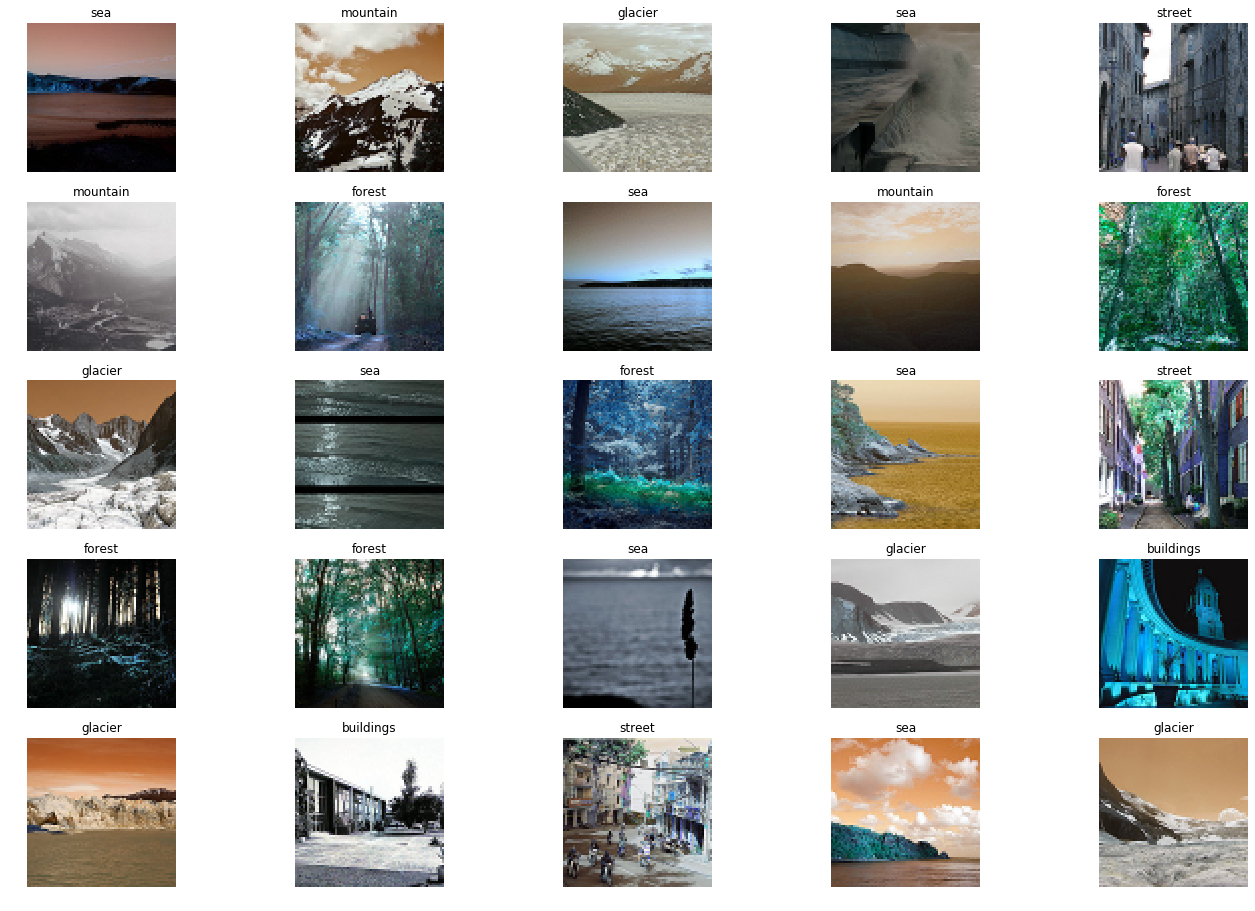

In [12]:

import matplotlib.pyplot as plot
from random import randint
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
  
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_img))
        ax[i,j].imshow(train_img[rnd_number])
        ax[i,j].set_title(get_classlabel(train.label[rnd_number]))
        ax[i,j].axis('off')

In [13]:
print("Shape of Images:",train_x.shape)
print("Shape of Labels:",train.label.shape)

Shape of Images: (17034, 75, 75, 3)
Shape of Labels: (17034,)


In [14]:
from keras.utils import to_categorical
y=to_categorical(train.label)

Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_img,y,test_size=0.25,random_state=42)


In [0]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from keras import regularizers
from keras.layers import BatchNormalization


In [17]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(75,75,3)))
model.add(Layers.BatchNormalization())
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu',kernel_regularizer=regularizers.l1_l2( l2=0.01)))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(50,activation='relu',kernel_regularizer=regularizers.l1_l2( l2=0.01)))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])



In [19]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 200)       5600      
_________________________________________________________________
batch_normalization_v1 (Batc (None, 73, 73, 200)       800       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 180)       324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 140)       226940    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 140)       0         
__________

In [0]:
trained=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Train on 12775 samples, validate on 4259 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
  256/12775 [..............................] - ETA: 1:20:58 - loss: 77.2376 - acc: 0.1523

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by dataset std
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in 0 to 180 degrees
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

In [0]:
from keras.applications import VGG16
VGG_model=VGG16(weights="imagenet",include_top=False,input_shape=(75,75,3))

In [0]:
for layer in VGG_model.layers[:-4]:
  layer.trainable=False
  
for layer in VGG_model.layers:
  print(layer,layer.trainable)
  

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras import regularizers
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(VGG_model)
model.add(BatchNormalization())
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1245,activation='relu'))
model.add(layers.Dropout(0.95))
model.add(layers.Dense(6, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

In [0]:
model.compile(loss='binary_crossentropy',
                            optimizer=optimizers.Adam(0.0001),
              metrics=['acc'])

In [0]:
trained=model.fit(X_train,y_train,epochs=25,batch_size = 128,validation_data=(X_test,y_test))

In [0]:
train_datagen.fit(X_train)


In [0]:
pred=model.predict_classes(test_img)

In [0]:
history = model.fit_generator(
  datagen.flow(X_train,y_train),
      steps_per_epoch=X_train.shape[0]/32 ,
        epochs=10,
      validation_data=(X_test,y_test),
      validation_steps=X_test.shape[0]/32,
verbose=1)

In [0]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [0]:
import matplotlib.pyplot as plot
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')

plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [0]:
ls/content/

In [0]:
from google.colab import files
loaded=files.upload()

In [0]:
sample=pd.read_csv("sample_submission_CH2mq5Z.csv")


In [0]:
sample.head()

In [0]:
sample.shape

In [0]:
sample['image_name'] = test['image_name']
sample['label'] = pred
sample.to_csv('VGG16.csv', header=True, index=False)



In [0]:
from google.colab import files
files.download('VGG16.csv') 

In [0]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [0]:
sample.head()